In [1]:
import warnings

# Ignore all user warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
import pandas as pd
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Sort the DataFrame by the 'prognosis' column in alphabetical order
df.sort_values(by='Disease', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [5]:
df.shape

(4920, 18)

In [6]:
# Separate the 'prognosis' column from the rest of the columns
Disease_column = df['Disease']
other_columns = df.drop(columns=['Disease'])

# Sort the other columns in alphabetical order
other_columns = other_columns.reindex(sorted(other_columns.columns), axis=1)

# Concatenate the sorted columns and 'prognosis' column
df_sorted = pd.concat([other_columns, Disease_column], axis=1)

# Print the DataFrame with columns sorted and 'prognosis' column at the end

In [7]:
df = pd.DataFrame(df)

# Replace all null values with 0
df = df.fillna('none')

# Display the resulting DataFrame
df.shape

(4920, 18)

In [8]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,unsteadiness,none,none,none,none,none,none,none,none,none,none,none,none
1,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,none,none,none,none,none,none,none,none,none,none,none
2,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,none,none,none,none,none,none,none,none,none,none,none,none
3,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,none,none,none,none,none,none,none,none,none,none,none
4,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,none,none,none,none,none,none,none,none,none,none,none


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# upgrade wordcloud has been installed

I will be doing a word cloud to identify overall respondent sentiment and specific symptom that drive the disease.

I understand that wordcloud can have words appear similar in size and fail to measure the symptom's value.

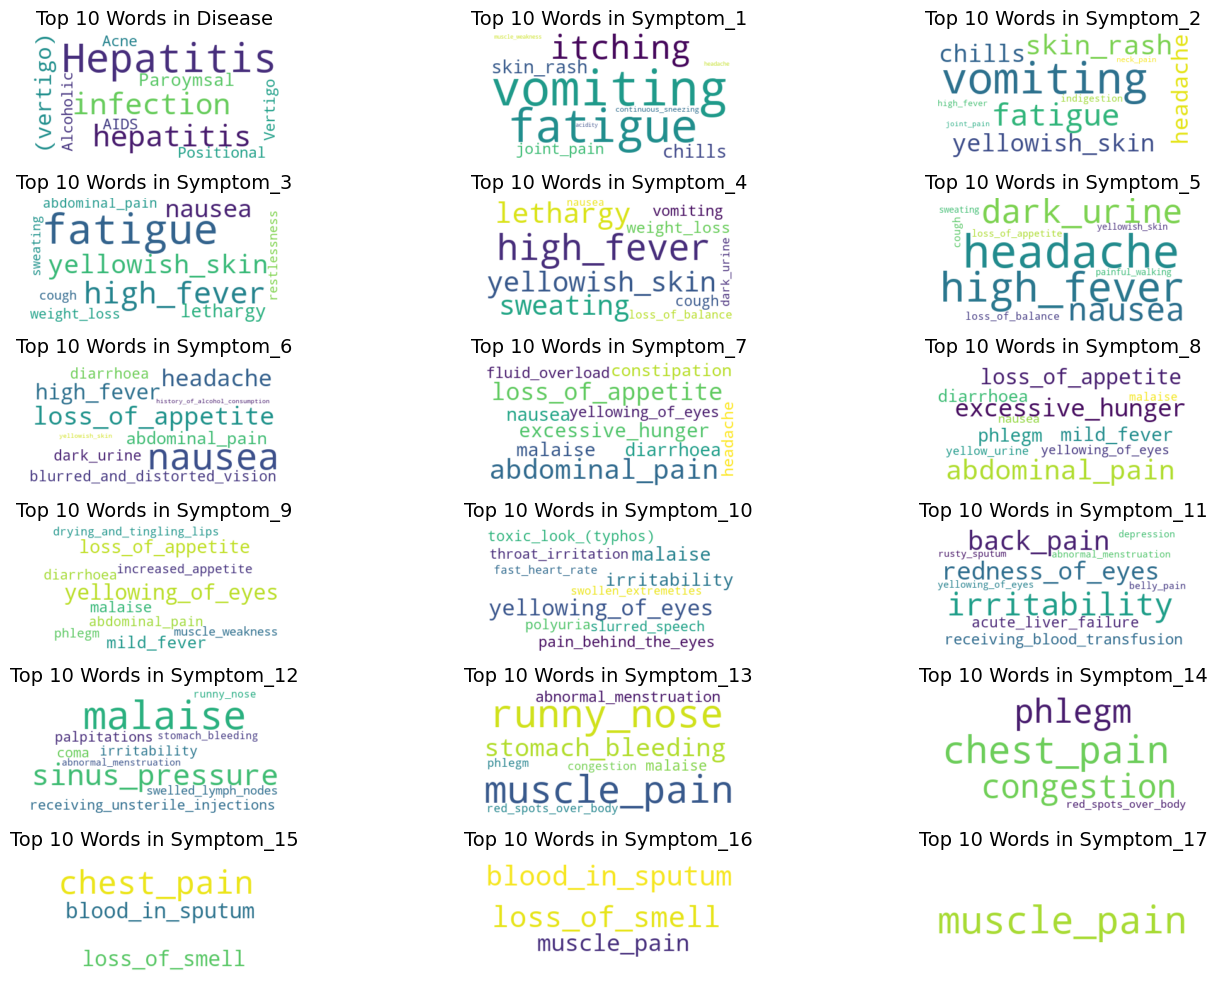

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Specify the columns for which you want to create word clouds
columns_to_analyze = [
    'Disease',
    'Symptom_1',
    'Symptom_2',
    'Symptom_3',
    'Symptom_4',
    'Symptom_5',
    'Symptom_6',
    'Symptom_7',
    'Symptom_8',
    'Symptom_9',
    'Symptom_10',
    'Symptom_11',
    'Symptom_12',
    'Symptom_13',
    'Symptom_14',
    'Symptom_15',
    'Symptom_16',
    'Symptom_17',
]

# Set the number of rows and columns for the grid layout
num_columns = 3
num_rows = (len(columns_to_analyze) + num_columns - 1) // num_columns

# Create subplots for each word cloud
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze):
    column_text = ' '.join(df[column].dropna())
    column_text = column_text.replace('none', '')
    
    # Count the frequency of each word and get the top 10
    word_counts = Counter(column_text.split())
    top_words = word_counts.most_common(10)
    top_words = dict(top_words)
    
    # Generate the word cloud based on the top words
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(top_words)
    
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    
    # Set the title with a larger font size
    plt.title(f'Top 10 Words in {column}', fontsize=14)
    
    plt.axis('off')

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


From this word cloud i can see that more majority of that 

In [11]:
# Specify the columns for which you want to list unique values
columns_to_analyze = [
    'Disease',
    'Symptom_1',
    'Symptom_2',
    'Symptom_3',
    'Symptom_4',
    'Symptom_5',
    'Symptom_6',
    'Symptom_7',
    'Symptom_8',
    'Symptom_9',
    'Symptom_10',
    'Symptom_11',
    'Symptom_12',
    'Symptom_13',
    'Symptom_14',
    'Symptom_15',
    'Symptom_16',
    'Symptom_17',
]

# Create a set to store unique values
unique_values = set()

# Loop through the specified columns and gather unique values
for column in columns_to_analyze:
    unique_values.update(df[column].unique())

# Print the unique values
for value in unique_values:
    print(value)


 altered_sensorium
 red_sore_around_nose
 indigestion
 dizziness
 acute_liver_failure
 receiving_blood_transfusion
 muscle_wasting
 pain_during_bowel_movements
 mood_swings
 joint_pain
 chest_pain
 bloody_stool
Osteoarthristis
 throat_irritation
 scurring
 unsteadiness
Acne
(vertigo) Paroymsal  Positional Vertigo
 prominent_veins_on_calf
Chronic cholestasis
 skin_peeling
 blackheads
Heart attack
Fungal infection
GERD
Hepatitis C
 shivering
Urinary tract infection
 irritability
 congestion
 loss_of_appetite
 spinning_movements
 muscle_weakness
 watering_from_eyes
 stomach_pain
 stomach_bleeding
 swelling_of_stomach
 extra_marital_contacts
 redness_of_eyes
 acidity
Hypothyroidism
 brittle_nails
AIDS
 pain_in_anal_region
 yellowing_of_eyes
 blood_in_sputum
 spotting_ urination
 palpitations
Cervical spondylosis
 passage_of_gases
 movement_stiffness
Paralysis (brain hemorrhage)
 nodal_skin_eruptions
 dehydration
 coma
 toxic_look_(typhos)
 chills
 foul_smell_of urine
 swollen_legs
 letharg

In [12]:
# Assuming you have a DataFrame 'df' with the 'Symptom_1' column
unique_symptom_1_values = df['Symptom_1'].unique()

# Print the unique values
for value in unique_symptom_1_values:
    print(value)


 vomiting
 headache
 muscle_wasting
 patches_in_throat
 pus_filled_pimples
 skin_rash
 yellowish_skin
 continuous_sneezing
 shivering
 muscle_weakness
 stiff_neck
 fatigue
 cough
 back_pain
 weakness_in_limbs
itching
 chills
 weight_loss
 constipation
 pain_during_bowel_movements
 stomach_pain
 acidity
 sunken_eyes
 breathlessness
 joint_pain
 chest_pain
 mood_swings
 weight_gain
 high_fever
 indigestion
 neck_pain
 burning_micturition
 bladder_discomfort
 cramps


In [13]:
# Assuming you have a DataFrame 'df' with the 'Symptom_1' column
unique_symptom_1_count = df['Symptom_1'].nunique()

# Print the count of unique values
print("Number of unique values in Symptom_1:", unique_symptom_1_count)


Number of unique values in Symptom_1: 34


In [14]:
# List of symptom columns to encode
symptom_columns_to_encode = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]

# Loop through each symptom column and encode it
for col in symptom_columns_to_encode:
    # Encode the current symptom column
    encoded_symptom = pd.get_dummies(df[col])
    
    # Rename columns for clarity
    column_mapping = {symptom: f"{col}_{symptom}" for symptom in encoded_symptom.columns}
    encoded_symptom.rename(columns=column_mapping, inplace=True)
    
    # Add the encoded symptom columns to the original DataFrame
    df = pd.concat([df, encoded_symptom], axis=1)
    
    # Drop the original symptom column
    df.drop(col, axis=1, inplace=True)


In [15]:
df.head(10)

,Disease,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chest_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,Symptom_1_ cough,Symptom_1_ cramps,Symptom_1_ fatigue,Symptom_1_ headache,Symptom_1_ high_fever,Symptom_1_ indigestion,Symptom_1_ joint_pain,Symptom_1_ mood_swings,Symptom_1_ muscle_wasting,Symptom_1_ muscle_weakness,Symptom_1_ neck_pain,Symptom_1_ pain_during_bowel_movements,Symptom_1_ patches_in_throat,Symptom_1_ pus_filled_pimples,Symptom_1_ shivering,Symptom_1_ skin_rash,Symptom_1_ stiff_neck,Symptom_1_ stomach_pain,Symptom_1_ sunken_eyes,Symptom_1_ vomiting,Symptom_1_ weakness_in_limbs,Symptom_1_ weight_gain,Symptom_1_ weight_loss,Symptom_1_ yellowish_skin,Symptom_1_itching,Symptom_2_ abdominal_pain,Symptom_2_ acidity,Symptom_2_ anxiety,Symptom_2_ blackheads,Symptom_2_ bladder_discomfort,Symptom_2_ blister,Symptom_2_ breathlessness,Symptom_2_ bruising,Symptom_2_ chest_pain,Symptom_2_ chills,Symptom_2_ cold_hands_and_feets,Symptom_2_ cough,Symptom_2_ cramps,Symptom_2_ dehydration,Symptom_2_ dizziness,Symptom_2_ fatigue,Symptom_2_ foul_smell_of urine,Symptom_2_ headache,Symptom_2_ high_fever,Symptom_2_ indigestion,Symptom_2_ joint_pain,Symptom_2_ knee_pain,Symptom_2_ lethargy,Symptom_2_ loss_of_appetite,Symptom_2_ mood_swings,Symptom_2_ nausea,Symptom_2_ neck_pain,Symptom_2_ nodal_skin_eruptions,Symptom_2_ pain_during_bowel_movements,Symptom_2_ pain_in_anal_region,Symptom_2_ patches_in_throat,Symptom_2_ pus_filled_pimples,Symptom_2_ restlessness,Symptom_2_ shivering,Symptom_2_ skin_peeling,Symptom_2_ skin_rash,Symptom_2_ stiff_neck,Symptom_2_ stomach_pain,Symptom_2_ sunken_eyes,Symptom_2_ sweating,Symptom_2_ swelling_joints,Symptom_2_ ulcers_on_tongue,Symptom_2_ vomiting,Symptom_2_ weakness_in_limbs,Symptom_2_ weakness_of_one_body_side,Symptom_2_ weight_gain,Symptom_2_ weight_loss,Symptom_2_ yellowish_skin,Symptom_3_ abdominal_pain,Symptom_3_ altered_sensorium,Symptom_3_ anxiety,Symptom_3_ blackheads,Symptom_3_ blister,Symptom_3_ bloody_stool,Symptom_3_ blurred_and_distorted_vision,Symptom_3_ breathlessness,Symptom_3_ bruising,Symptom_3_ burning_micturition,Symptom_3_ chest_pain,Symptom_3_ chills,Symptom_3_ cold_hands_and_feets,Symptom_3_ continuous_feel_of_urine,Symptom_3_ cough,Symptom_3_ dark_urine,Symptom_3_ dehydration,Symptom_3_ diarrhoea,Symptom_3_ dischromic _patches,Symptom_3_ dizziness,Symptom_3_ extra_marital_contacts,Symptom_3_ fatigue,Symptom_3_ foul_smell_of urine,Symptom_3_ headache,Symptom_3_ high_fever,Symptom_3_ hip_joint_pain,Symptom_3_ joint_pain,Symptom_3_ knee_pain,Symptom_3_ lethargy,Symptom_3_ loss_of_appetite,Symptom_3_ loss_of_balance,Symptom_3_ mood_swings,Symptom_3_ movement_stiffness,Symptom_3_ nausea,Symptom_3_ neck_pain,Symptom_3_ nodal_skin_eruptions,Symptom_3_ obesity,Symptom_3_ pain_in_anal_region,Symptom_3_ red_sore_around_nose,Symptom_3_ restlessness,Symptom_3_ scurring,Symptom_3_ silver_like_dusting,Symptom_3_ skin_peeling,Symptom_3_ spinning_movements,Symptom_3_ stomach_pain,Symptom_3_ sweating,Symptom_3_ swelling_joints,Symptom_3_ swelling_of_stomach,Symptom_3_ ulcers_on_tongue,Symptom_3_ vomiting,Symptom_3_ watering_from_eyes,Symptom_3_ weakness_of_one_body_side,Symptom_3_ weight_loss,Symptom_3_ yellowish_skin,Symptom_4_ abdominal_pain,Symptom_4_ altered_sensorium,Symptom_4_ bloody_stool,Symptom_4_ blurred_and_distorted_vision,Symptom_4_ breathlessness,Symptom_4_ burning_micturition,Symptom_4_ chest_pain,Symptom_4_ continuous_feel_of_urine,Symptom_4_ cough,Symptom_4_ dark_urine,Symptom_4_ diarrhoea,Symptom_4_ dischromic _patches,Symptom_4_ distention_of_abdomen,Symptom_4_ dizziness,Symptom_4_ excessive_hunger,Symptom_4_ extra_marital_contacts,Symptom_4_ family_history,Symptom_4_ fatigue,Symptom_4_ headache,Symptom_4_ high_fever,Symptom_4_ hip_joint_pain,Symptom_4_ irregular_sugar_level,Symptom_4_ irritation_in_anus,Symptom_4_ lack_of_concentration,Symptom_4_

In [16]:
# Create a DataFrame
df = pd.DataFrame(df)

# List of column names containing "none"
columns_to_drop = [col for col in df.columns if 'none' in col]

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [17]:
# Define a function to rename the columns
def rename_columns(col):
    col = col.replace('Symptom_', '')  # Remove "Symptom_"
    col = ''.join([c for c in col if not c.isdigit()])  # Remove numbers 0-9
    col = col.replace('_', '')  # Remove underscores
    return col

# Rename the columns
df.columns = [rename_columns(col) for col in df.columns]

In [18]:
# Remove spaces before column names
df.columns = df.columns.str.strip()

df.columns

Index(['Disease', 'acidity', 'backpain', 'bladderdiscomfort', 'breathlessness',
       'burningmicturition', 'chestpain', 'chills', 'constipation',
       'continuoussneezing',
       ...
       'congestion', 'phlegm', 'redspotsoverbody', 'bloodinsputum',
       'chestpain', 'lossofsmell', 'bloodinsputum', 'lossofsmell',
       'musclepain', 'musclepain'],
      dtype='object', length=395)

In [19]:
unique_diseases = df['Disease'].unique()
unique_diseases

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [20]:
df['Disease'].nunique()

41

fatigue, vomiting, highfever, lossofappetite, nausea, headache, abdominalpain, yellowishskin, yellowingofeyes, chill are the column most used

In [21]:
# Group the columns by their names and aggregate their values by sum
df_combined = df.groupby(level=0, axis=1).sum()

# If you want to join the values with a separator (e.g., a comma)
# df_combined = df.groupby(level=0, axis=1).agg(','.join)

# Reset the index to make it a regular DataFrame
df_combined = df_combined.reset_index()

# Display the resulting DataFrame
df = df_combined


In [22]:
df.head()

,index,Disease,abdominalpain,abnormalmenstruation,acidity,acuteliverfailure,alteredsensorium,anxiety,backpain,bellypain,blackheads,bladderdiscomfort,blister,bloodinsputum,bloodystool,blurredanddistortedvision,breathlessness,brittlenails,bruising,burningmicturition,chestpain,chills,coldhandsandfeets,coma,congestion,constipation,continuousfeelofurine,continuoussneezing,cough,cramps,darkurine,dehydration,depression,diarrhoea,dischromic patches,distentionofabdomen,dizziness,dryingandtinglinglips,enlargedthyroid,excessivehunger,extramaritalcontacts,familyhistory,fastheartrate,fatigue,fluidoverload,foulsmellof urine,headache,highfever,hipjointpain,historyofalcoholconsumption,increasedappetite,indigestion,inflammatorynails,internalitching,irregularsugarlevel,irritability,irritationinanus,itching,jointpain,kneepain,lackofconcentration,lethargy,lossofappetite,lossofbalance,lossofsmell,malaise,mildfever,moodswings,movementstiffness,mucoidsputum,musclepain,musclewasting,muscleweakness,nausea,neckpain,nodalskineruptions,obesity,painbehindtheeyes,painduringbowelmovements,painfulwalking,paininanalregion,palpitations,passageofgases,patchesinthroat,phlegm,polyuria,prominentveinsoncalf,puffyfaceandeyes,pusfilledpimples,receivingbloodtransfusion,receivingunsterileinjections,rednessofeyes,redsorearoundnose,redspotsoverbody,restlessness,runnynose,rustysputum,scurring,shivering,silverlikedusting,sinuspressure,skinpeeling,skinrash,slurredspeech,smalldentsinnails,spinningmovements,spotting urination,stiffneck,stomachbleeding,stomachpain,sunkeneyes,sweating,swelledlymphnodes,swellingjoints,swellingofstomach,swollenbloodvessels,swollenextremeties,swollenlegs,throatirritation,toxiclook(typhos),ulcersontongue,unsteadiness,visualdisturbances,vomiting,wateringfromeyes,weaknessinlimbs,weaknessofonebodyside,weightgain,weightloss,yellowcrustooze,yellowingofeyes,yellowishskin,yellowurine
0,0,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,2,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,4,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [23]:
columns_to_mean = ['fatigue', 'vomiting', 'highfever', 'lossofappetite', 'nausea', 'headache', 'abdominalpain', 'yellowishskin', 'yellowingofeyes', 'chills']

result = df.groupby('Disease')[columns_to_mean].agg('mean')

# Filter the results to show only values greater than 0
filtered_result = result[result.gt(0).any(axis=1)]

# Display the filtered result
filtered_result


,fatigue,vomiting,highfever,lossofappetite,nausea,headache,abdominalpain,yellowishskin,yellowingofeyes,chills
Disease,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.00,0.95,0.00,0.00,0.95,0.95,0.00,0.00,0.00,0.00
AIDS,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Alcoholic hepatitis,0.00,0.95,0.00,0.00,0.00,0.00,0.95,0.95,0.00,0.00
Allergy,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90
Bronchial Asthma,0.90,0.00,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chicken pox,0.95,0.00,0.95,0.95,0.00,0.95,0.00,0.00,0.00,0.00
Chronic cholestasis,0.00,0.95,0.00,0.95,0.95,0.00,0.95,0.95,0.95,0.00
Common Cold,0.95,0.00,0.95,0.00,0.00,0.95,0.00,0.00,0.00,0.95
Dengue,0.95,0.95,0.95,1.00,1.00,1.00,0.00,0.00,0.00,0.95


95% of the patient who suffer from Migrain has the acidity symptom

In [24]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Group by 'Disease' and calculate the mean for all columns
result = df.groupby('Disease').mean()

# Filter the results to show only rows with values greater than 0
filtered_result = result[result.gt(0).any(axis=1)]

# Define a function to highlight values greater than 0
def highlight_positive(val):
    color = 'background-color: yellow' if val > 0 else ''
    return color

# Apply the highlighting function to the entire DataFrame
styled_result = filtered_result.style.applymap(highlight_positive)

# Display the styled result
styled_result


,index,abdominalpain,abnormalmenstruation,acidity,acuteliverfailure,alteredsensorium,anxiety,backpain,bellypain,blackheads,bladderdiscomfort,blister,bloodinsputum,bloodystool,blurredanddistortedvision,breathlessness,brittlenails,bruising,burningmicturition,chestpain,chills,coldhandsandfeets,coma,congestion,constipation,continuousfeelofurine,continuoussneezing,cough,cramps,darkurine,dehydration,depression,diarrhoea,dischromic patches,distentionofabdomen,dizziness,dryingandtinglinglips,enlargedthyroid,excessivehunger,extramaritalcontacts,familyhistory,fastheartrate,fatigue,fluidoverload,foulsmellof urine,headache,highfever,hipjointpain,historyofalcoholconsumption,increasedappetite,indigestion,inflammatorynails,internalitching,irregularsugarlevel,irritability,irritationinanus,itching,jointpain,kneepain,lackofconcentration,lethargy,lossofappetite,lossofbalance,lossofsmell,malaise,mildfever,moodswings,movementstiffness,mucoidsputum,musclepain,musclewasting,muscleweakness,nausea,neckpain,nodalskineruptions,obesity,painbehindtheeyes,painduringbowelmovements,painfulwalking,paininanalregion,palpitations,passageofgases,patchesinthroat,phlegm,polyuria,prominentveinsoncalf,puffyfaceandeyes,pusfilledpimples,receivingbloodtransfusion,receivingunsterileinjections,rednessofeyes,redsorearoundnose,redspotsoverbody,restlessness,runnynose,rustysputum,scurring,shivering,silverlikedusting,sinuspressure,skinpeeling,skinrash,slurredspeech,smalldentsinnails,spinningmovements,spotting urination,stiffneck,stomachbleeding,stomachpain,sunkeneyes,sweating,swelledlymphnodes,swellingjoints,swellingofstomach,swollenbloodvessels,swollenextremeties,swollenlegs,throatirritation,toxiclook(typhos),ulcersontongue,unsteadiness,visualdisturbances,vomiting,wateringfromeyes,weaknessinlimbs,weaknessofonebodyside,weightgain,weightloss,yellowcrustooze,yellowingofeyes,yellowishskin,yellowurine
Disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,59.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AIDS,179.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.90000

In [25]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Group by 'Disease' and calculate the mean for all columns
result = df.groupby('Disease').mean()

# Calculate the total sum for each column
column_sums = result.sum()

# Convert the mean values to percentages
percentage_result = (result / column_sums) * 100

# Filter the results to show only rows with values greater than 0
filtered_percentage_result = percentage_result[percentage_result.gt(0).any(axis=1)]

# Define a function to highlight values greater than 0
def highlight_positive(val):
    color = 'background-color: yellow' if val > 0 else ''
    return color

# Apply the highlighting function to the entire DataFrame
styled_percentage_result = filtered_percentage_result.style.applymap(highlight_positive)

# Display the styled result with percentages
styled_percentage_result


,index,abdominalpain,abnormalmenstruation,acidity,acuteliverfailure,alteredsensorium,anxiety,backpain,bellypain,blackheads,bladderdiscomfort,blister,bloodinsputum,bloodystool,blurredanddistortedvision,breathlessness,brittlenails,bruising,burningmicturition,chestpain,chills,coldhandsandfeets,coma,congestion,constipation,continuousfeelofurine,continuoussneezing,cough,cramps,darkurine,dehydration,depression,diarrhoea,dischromic patches,distentionofabdomen,dizziness,dryingandtinglinglips,enlargedthyroid,excessivehunger,extramaritalcontacts,familyhistory,fastheartrate,fatigue,fluidoverload,foulsmellof urine,headache,highfever,hipjointpain,historyofalcoholconsumption,increasedappetite,indigestion,inflammatorynails,internalitching,irregularsugarlevel,irritability,irritationinanus,itching,jointpain,kneepain,lackofconcentration,lethargy,lossofappetite,lossofbalance,lossofsmell,malaise,mildfever,moodswings,movementstiffness,mucoidsputum,musclepain,musclewasting,muscleweakness,nausea,neckpain,nodalskineruptions,obesity,painbehindtheeyes,painduringbowelmovements,painfulwalking,paininanalregion,palpitations,passageofgases,patchesinthroat,phlegm,polyuria,prominentveinsoncalf,puffyfaceandeyes,pusfilledpimples,receivingbloodtransfusion,receivingunsterileinjections,rednessofeyes,redsorearoundnose,redspotsoverbody,restlessness,runnynose,rustysputum,scurring,shivering,silverlikedusting,sinuspressure,skinpeeling,skinrash,slurredspeech,smalldentsinnails,spinningmovements,spotting urination,stiffneck,stomachbleeding,stomachpain,sunkeneyes,sweating,swelledlymphnodes,swellingjoints,swellingofstomach,swollenbloodvessels,swollenextremeties,swollenlegs,throatirritation,toxiclook(typhos),ulcersontongue,unsteadiness,visualdisturbances,vomiting,wateringfromeyes,weaknessinlimbs,weaknessofonebodyside,weightgain,weightloss,yellowcrustooze,yellowingofeyes,yellowishskin,yellowurine
Disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.059005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.052910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.947644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,5.956113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AIDS,0.178006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.370044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

From this percentage result i can see that patient who have abnormalmenstruation will have 50% of Hyperthyroidism and 50% Hypothyroidism. Patient who have acuteliver failure will 100% have Hepatitis E. 

# Hypothesis 1 

abdominalpain have relationship with Alcoholic hepatitis

* H0: abdominalpain does not have relationship with Alcoholic hepatitis
* H1: abdominalpain does have relationship with Alcoholic hepatitis

In [26]:
# Alcoholic vs abdominalpain
# Filter the data into two groups: 'Alcoholic hepatitis' and 'Other Diseases'
alcoholic_hepatitis_group = df[df['Disease'] == 'Alcoholic hepatitis']
other_diseases_group = df[df['Disease'] != 'Alcoholic hepatitis']

# Perform an independent T-test
t_statistic, p_value = ttest_ind(alcoholic_hepatitis_group['abdominalpain'], other_diseases_group['abdominalpain'])

# Set the significance level
alpha = 0.05

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("They have a significant correlation. We reject the null hypothesis.")
else:
    print("They don't have a significant correlation. We fail to reject the null hypothesis.")


T-statistic: 21.0490449638999
P-value: 2.9962279590517525e-94
They have a significant correlation. We reject the null hypothesis.


# Hypothesis 2 

vomiting have relationship with Chronic cholestasis

* H0: vomiting does not have relationship with Chronic cholestasis
* H1: vomiting does have relationship with Chronic cholestasis


In [27]:
# Assuming 'df' is your DataFrame

# Filter the data into two groups: 'Chronic cholestasis' and 'Other Diseases'
chronic_cholestasis_group = df[df['Disease'] == 'Chronic cholestasis']
other_diseases_group = df[df['Disease'] != 'Chronic cholestasis']

# Perform an independent T-test
t_statistic, p_value = ttest_ind(chronic_cholestasis_group['vomiting'], other_diseases_group['vomiting'])

# Set the significance level
alpha = 0.05

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("We are testing a feature that responded with only 5.95%, we can say they have a some correlation. We reject the null hypothesis.")
else:
    print("They don't have a significant correlation. We fail to reject the null hypothesis.")


T-statistic: 12.97529083498545
P-value: 7.028891686543033e-38
We are testing a feature that responded with only 5.95%, we can say they have a some correlation. We reject the null hypothesis.


# Hypothesis 3

fluidoverload have relationship with Alcoholic hepatitis

* H0: fluidoverload does not have relationship with Alcohol hepatitis
* H1: fluidoverload does have relationship with Alcohol hepatitis

In [28]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame

# Filter the data into two groups: 'Alcoholic hepatitis' and 'Other Diseases'
alcoholic_hepatitis_group = df[df['Disease'] == 'Alcoholic hepatitis']
other_diseases_group = df[df['Disease'] != 'Alcoholic hepatitis']

# Perform an independent T-test
t_statistic, p_value = ttest_ind(alcoholic_hepatitis_group['fluidoverload'], other_diseases_group['fluidoverload'])

# Set the significance level
alpha = 0.05

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print(" We are testing a feature that responded 100% to the symptom, we can see our stat show that they have a significant correlation. We reject the null hypothesis.")
else:
    print("They don't have a significant correlation. We fail to reject the null hypothesis.")


T-statistic: 301.93199040391244
P-value: 0.0
 We are testing a feature that responded 100% to the symptom, we can see our stat show that they have a significant correlation. We reject the null hypothesis.


# Split then Model

In [36]:
# Load your data
# Assuming 'df' is your DataFrame

# Define features (X) and target (y)
X = df.drop('Disease', axis=1)
y = df['Disease']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocess the data (e.g., scale/normalize the features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create and train the model (Random Forest classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate the model on the validation set
y_pred_val = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))

# Generate the classification report for the validation set
classification_report_val = classification_report(y_val, y_pred_val)
print("Classification Report on Validation Set:")
print(classification_report_val)

# Run the model on the training set
y_pred_train = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: {:.2f}%".format(training_accuracy * 100))

# Generate the classification report for the training set
classification_report_train = classification_report(y_train, y_pred_train)
print("Classification Report on Training Set:")
print(classification_report_train)


Validation Accuracy: 100.00%
Classification Report on Validation Set:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        17
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        15
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       1.00      1.00      1.00        26
                   Cervical spondylosis       1.00      1.00      1.00        14
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        22
                            Common Col

In [37]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Validate the model on the validation set
y_pred_dt_val = dt_model.predict(X_val)
validation_accuracy_dt = accuracy_score(y_val, y_pred_dt_val)
print("Decision Tree Validation Accuracy: {:.2f}%".format(validation_accuracy_dt * 100))

# Generate the classification report for the validation set
classification_report_dt_val = classification_report(y_val, y_pred_dt_val)
print("Decision Tree Classification Report on Validation Set:")
print(classification_report_dt_val)

# Run the model on the training set
y_pred_dt_train = dt_model.predict(X_train)
training_accuracy_dt = accuracy_score(y_train, y_pred_dt_train)
print("Decision Tree Training Accuracy: {:.2f}%".format(training_accuracy_dt * 100))

# Generate the classification report for the training set
classification_report_dt_train = classification_report(y_train, y_pred_dt_train)
print("Decision Tree Classification Report on Training Set:")
print(classification_report_dt_train)


Decision Tree Validation Accuracy: 99.73%
Decision Tree Classification Report on Validation Set:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        17
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        15
                                Allergy       0.96      1.00      0.98        24
                              Arthritis       1.00      0.94      0.97        18
                       Bronchial Asthma       1.00      1.00      1.00        26
                   Cervical spondylosis       1.00      1.00      1.00        14
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        22
           

In [38]:
# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Validate the model on the validation set
y_pred_knn_val = knn_model.predict(X_val)
validation_accuracy_knn = accuracy_score(y_val, y_pred_knn_val)
print("K-Nearest Neighbors Validation Accuracy: {:.2f}%".format(validation_accuracy_knn * 100))

# Generate the classification report for the validation set
classification_report_knn_val = classification_report(y_val, y_pred_knn_val)
print("K-Nearest Neighbors Classification Report on Validation Set:")
print(classification_report_knn_val)

# Run the model on the training set
y_pred_knn_train = knn_model.predict(X_train)
training_accuracy_knn = accuracy_score(y_train, y_pred_knn_train)
print("K-Nearest Neighbors Training Accuracy: {:.2f}%".format(training_accuracy_knn * 100))

# Generate the classification report for the training set
classification_report_knn_train = classification_report(y_train, y_pred_knn_train)
print("K-Nearest Neighbors Classification Report on Training Set:")
print(classification_report_knn_train)


K-Nearest Neighbors Validation Accuracy: 100.00%
K-Nearest Neighbors Classification Report on Validation Set:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        17
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        15
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       1.00      1.00      1.00        26
                   Cervical spondylosis       1.00      1.00      1.00        14
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        2

In [39]:
# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Validate the model on the validation set
y_pred_knn_val = knn_model.predict(X_val)
validation_accuracy_knn = accuracy_score(y_val, y_pred_knn_val)
print("K-Nearest Neighbors Validation Accuracy: {:.2f}%".format(validation_accuracy_knn * 100))

# Generate the classification report for the validation set
classification_report_knn_val = classification_report(y_val, y_pred_knn_val)
print("K-Nearest Neighbors Classification Report on Validation Set:")
print(classification_report_knn_val)

# Test the model on the test set
y_pred_knn_test = knn_model.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn_test)
print("K-Nearest Neighbors Test Accuracy: {:.2f}%".format(test_accuracy_knn * 100))

# Generate the classification report for the test set
classification_report_knn_test = classification_report(y_test, y_pred_knn_test)
print("K-Nearest Neighbors Classification Report on Test Set:")
print(classification_report_knn_test)


K-Nearest Neighbors Validation Accuracy: 100.00%
K-Nearest Neighbors Classification Report on Validation Set:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        17
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        15
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       1.00      1.00      1.00        26
                   Cervical spondylosis       1.00      1.00      1.00        14
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        2

In [40]:
# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Test the model on the test set
y_pred_knn_test = knn_model.predict(X_test)

# Create a DataFrame with the test set and predictions
test_df = pd.DataFrame({'Actual_Disease': y_test, 'Predicted_Disease': y_pred_knn_test})

# Save the DataFrame to a CSV file
test_df.to_csv('knn_predictions.csv', index=False)


In [47]:
prediction = pd.read_csv('knn_predictions.csv')
prediction.tail(20)


,Actual_Disease,Predicted_Disease
718,Psoriasis,Psoriasis
719,AIDS,AIDS
720,Tuberculosis,Tuberculosis
721,Fungal infection,Fungal infection
722,Arthritis,Arthritis
723,Heart attack,Heart attack
724,Tuberculosis,Tuberculosis
725,Hypothyroidism,Hypothyroidism
726,Alcoholic hepatitis,Alcoholic hepatitis
727,Migraine,Migraine
